## [作業重點]
了解如何使用 Sklearn 中的 hyper-parameter search 找出最佳的超參數

### 作業
請使用不同的資料集，並使用 hyper-parameter search 的方式，看能不能找出最佳的超參數組合

In [1]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

In [2]:
diabetes = datasets.load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.25, random_state=42)
regr = DecisionTreeRegressor()

In [3]:
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print(metrics.mean_squared_error(y_test, y_pred))

5581.927927927928


In [4]:
# 設定要訓練的超參數組合
min_samples_split = [2, 20, 100]
max_depth = [2 ,3 ,4 ,5 ,6]
param_grid = dict(min_samples_split=min_samples_split, max_depth=max_depth)

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(regr, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)

# 預設會跑 5-fold cross-validadtion，總共 15 種參數組合，總共要 train 75 次模型

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.8s finished


In [5]:
# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: -3974.003337 using {'max_depth': 2, 'min_samples_split': 2}


In [6]:
# 使用最佳參數重新建立模型
regr_bestparam =  DecisionTreeRegressor(max_depth=grid_result.best_params_['max_depth'],
                                           min_samples_split=grid_result.best_params_['min_samples_split'])
# 訓練模型
regr_bestparam.fit(x_train, y_train)
# 預測測試集
y_pred = regr_bestparam.predict(x_test)

In [7]:
# 調整參數後的 MSE
print(metrics.mean_squared_error(y_test, y_pred))

3649.4090253107397


In [8]:
s = 7
X = x_test[:,s]
Xtrain=np.sort(x_train[:,s])[:,np.newaxis]
Xtest = np.sort(x_test[:,s])[:,np.newaxis]
regr.fit(Xtrain, y_train)
y_pred_1 = regr.predict(Xtest)
print(metrics.mean_squared_error(y_test, y_pred_1))
regr_bestparam.fit(x_train[:,s,np.newaxis], y_train)
y_pred_2 = regr_bestparam.predict(x_test[:,s,np.newaxis])
print(metrics.mean_squared_error(y_test, y_pred_2))

5447.234091053191
4561.024023113229


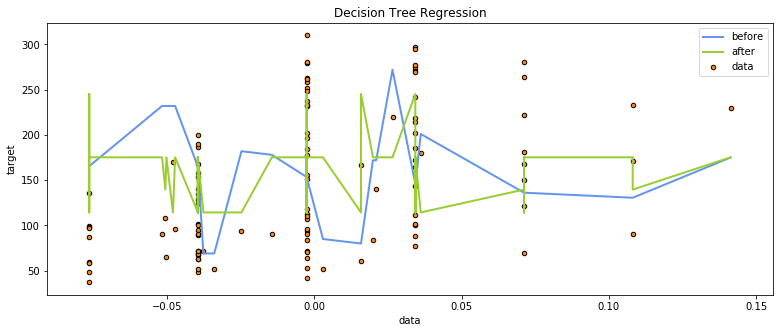

In [9]:
plt.figure(figsize=(13,5))
plt.scatter(X,  y_test, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(Xtest , y_pred_1, color="cornflowerblue",label="before",linewidth=2)
plt.plot(Xtest, y_pred_2, color="yellowgreen",label="after", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()